# Advanced Data Analysis - Assignment 3

This notebook contains the proposed solution for **Assignment 3** of the Advanced Data Analysis course.

The assignment is **individual**.

[//]: # (We will be using latex for fomulas)

<script type="text/javascript"
        src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.0/MathJax.js?config=TeX-AMS_CHTML"></script>
        
        

# Group I 

Nowadays, industry players are using product quality certifications to promote their products.
Vital factor in red wine certification and quality assessment is physicochemical tests, which
are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical
properties. We would like to determine which feature(s) can be used regression that
best predicts the quality red wine.

Structure of the dataset:
Input variables (based on physicochemical tests):
- Fixed Acidity: Most acids involved with wine or fixed or non-volatile (do not evaporate readily)
- Volatile Acidity: The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
- Citric Acid: Often added to wines to increase acidity, complement a specific flavor or prevent ferric hazes
- Residual Sugar: From the natural grape sugars left in a wine after the alcoholic fermentation finishes.
- Chlorides: The amount of salt in the wine
- Free Sulfur Dioxide: It prevents microbial growth and the oxidation of wine
- Total Sulfur Dioxide: The amount of free + bound forms of SO₂
- Density: Sweeter wines have a higher density
- pH: Describes the level of acidity on a scale of 0–14. Most wines are always between 3–4 on the pH scale
- Alcohol: Available in small quantities in wines makes the drinkers sociable
- Sulphates: A wine additive that contributes to SO₂ levels and acts as an antimicrobial and antioxidant
- Quality: which is the output variable/predictor

The dataset source is taken from https://archive.ics.uci.edu/ml/datasets/wine+quality.


In [72]:
# This code cell does not need to be changed
import os
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

dataFileName = "winequality-red.csv"
dataDF = pd.read_csv(dataFileName)

dataDF.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Question 1 (1 point out of 20)

Identify the variables that are more linearly correlated with the quality of red wine

In [73]:
#TODO
# Pearson Correlation features correlated with quality
print('Sorted Correlation with highest correlation to quality')
dataDF_corr_quality = dataDF.corrwith(dataDF['quality']).abs().to_frame(name='correlation of quality shown absolut correlations').sort_values(by='correlation of quality shown absolut correlations',ascending=False)
display(dataDF_corr_quality)


Sorted Correlation with highest correlation to quality


,correlation of quality shown absolut correlations
quality,1.000000
alcohol,0.476166
volatile acidity,0.390558
sulphates,0.251397
citric acid,0.226373
total sulfur dioxide,0.185100
density,0.174919
chlorides,0.128907
fixed acidity,0.124052
pH,0.057731


## Question 2 ( 2 points out of 20)

Estimate the true error of a model that uses the top 4 variables more correlated with the quality of red wine

In [74]:
#TODO
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

def regression_f(input, price):
    model = linear_model.LinearRegression()
    return -1*cross_val_score(model, input, price, scoring='neg_mean_squared_error', cv=10).mean()

# Multiple lineare regression
test_error_multiple_linear = regression_f(dataDF[['alcohol', 'volatile acidity','sulphates','citric acid']], dataDF[['quality']])
print(f'Estimated true error (test error): {test_error_multiple_linear}')

Estimated true error (test error): 0.4439518038537466


## Question 3 ( 4 points out of 20)

Evaluate two other models of your choice and compare/discuss their expected errors? (explain your criteria for each model tested)

In [75]:
#TODO

# Polynomial linear regression by using the degree of 2 and just alcohol
print("Using a Polynomial linear regression by using the degree of 2 and just alcohol with the highest correlation with quality")
polynomial_features_poly_linear = PolynomialFeatures(degree = 2)
test_error_poly_linear = regression_f(polynomial_features_poly_linear.fit_transform(dataDF[['alcohol']]), dataDF[['quality']])
print(f'Estimated true error (test error): {test_error_poly_linear}')

# Multiple non-linear regression model 3 degree and 3 features
print("Using a Multiple non-linear regression model 3 degree and 3 features with highest correlations with quality")
polynomial_features_multipl_non_linear_three_var = PolynomialFeatures(degree = 3)
test_error_poly_multipl_non_linear_three_var = regression_f(polynomial_features_multipl_non_linear_three_var.fit_transform(dataDF[['alcohol', 'volatile acidity','sulphates']]), dataDF[['quality']])
print(f'Estimated true error (test error): {test_error_poly_multipl_non_linear_three_var}')

Using a Polynomial linear regression by using the degree of 2 and just alcohol with the highest correlation with quality
Estimated true error (test error): 0.510860408433605
Using a Multiple non-linear regression model 3 degree and 3 features with highest correlations with quality
Estimated true error (test error): 0.4233623380146877


### Relational:

Models used:
1. Polynomial linear regression by using the degree of 2 and alcohol as the variable with highest correlation
2. Multiple non-linear regression model 3 degree and the three variables (alcohol,volatile acidity,sulphates) with the highest correlation with the quality of wine

- I used different models to show the differences of the accuracy by using different model to one dataset and also vary the amount of variables in the models and the degree of of the models
- By Polynomial linear regression i used just alcohol as a variable because it is the variable with the highest correlation
- By Multiple non-linear regression model I am using the first three varibles with the highest correlation

Result:

Comparing the three calculated models:

- The Polynomial linear regression with a degree od 2 is performing worser with a true error of 0.51 than the multiple linear regression from question 2 with a true error of 0.44 and the multiple non-linear regression model with a degree of 3 and the three variables with the highest correlation related to quality with a true error of 0.42. 
- That the multiple non-linear regression model with a degree of 3 and the three variables has the best perfomrance is due to the fact that not only the one variable with the highest correlation but also the two other variables with the highest correlation were included and the data points with the mutual dependencies can thus be better described. On the other hand, a higher degree can better adapt to the trend of the data, which leads to more accurate predictions. As mentioned above, a higher degree also decreases the accuracy as I found with degree 4 due to overfitting. Also just adding randomly new variables can decrease the accuracy. Thus be aware of using just limited and really important variables.
- You can see that by just using the most important three variables which have the highest correlation with the qualtiy of wine the true error recuded and is just 0.423 and thus the multiple non-linear regression model is the best model of the three models tested in the questions 2 and 3.



Explanation of the criterias of the choice of the models regarding the degree and variables:

- I used the degree of 3 because a higher degree as 3 for example a degree of 4 lets the error raises by a change from 3 to 4 from 0,42 to 0,44 thats why I will continue with a degree of 3
- Used these variables and 3 because there are most correlated and adding other less correlated varibales would decrease the accuracy and increase the true error because they have no impact on the quality.
- It is more resonable to look on limited and important variables.
- It is shown that not just adding randome additionally variables into a model will improve the model and will reduce the true error. It is the other way round and randome added variables will just increase the true error and degrade the accuracy of the model. I tested it and added also the variable with the fourth highest correlation called 'citric acid' to the multiple non-linear regression model and got an higher true error of 0.48. Thats why I decided to just take the three variables with the highest correlation with the quality of wine.

## Question 4 ( 3 points out of 20)

Based on the best model identified previously, build a final model, report the formula (coefficients found) and evaluate it. On average, how far is your predictions from the actual values?

Intercept of the model= [21.96700965]
Coefficients of the model= [[ 0.00000000e+00 -8.47914602e+00  3.37896984e+01  3.26202476e+01
   1.00302673e+00 -4.97659879e+00 -3.39883505e+00 -3.06136020e+00
  -1.92028384e+01 -1.22122696e+01 -3.53564134e-02  1.93488812e-01
   1.14246623e-01 -3.98791834e-03  1.12857435e+00  4.96237750e-01
   4.74972092e-01  3.68454945e+00  2.38057645e+00  1.57736980e+00]]

Test error/True error (mean absolut error): 0.48290061196489376

Average residuals of 0.48290061196489376


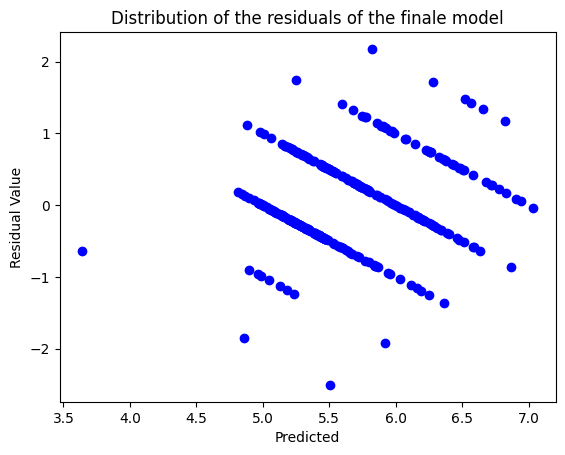

In [76]:
#TODO

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


polynomial_features = PolynomialFeatures(degree = 3)
seed = 40
# Set polynomial features and build the dataframe
poly_trans_x = polynomial_features.fit_transform(dataDF[['alcohol', 'volatile acidity','sulphates']])
poly_trans_x_df = pd.DataFrame(poly_trans_x)

# Define y
y = dataDF[['quality']]
y_df = pd.DataFrame(y)

# Include quality column in the poly_trans_x_df
poly_trans_all_df = poly_trans_x_df
poly_trans_all_df['quality'] = dataDF[['quality']]


#display(poly_trans_all_df)

# Split in train and test set
train_set, test_set = train_test_split(poly_trans_all_df, test_size = 0.2, random_state = seed)

#Print intercept
print("Intercept of the model= " +str(model_fit.intercept_))
print("Coefficients of the model= " +str(model_fit.coef_))

# Save the varibales of test and train set

x_train = train_set.drop(['quality'], axis=1)
y_train = train_set[['quality']]

x_test = test_set.drop(['quality'], axis=1)
y_test = test_set[['quality']]


#Fit the model with train data
model = linear_model.LinearRegression()
model_fit = model.fit(train_set.drop(['quality'], axis = 1), train_set[['quality']])

# Calculation of the Mean absolut error of the model
poly_model = model.predict(x_train)

poly_pred_test = model.predict(x_test)

error_train = mean_absolute_error(y_train, poly_model)

error_test = mean_absolute_error(y_test, poly_pred_test)

print()
print('Test error/True error (mean absolut error): '+ str(error_test))


# Plot resiudal
y_pred_test = model_fit.predict(test_set.drop(['quality'], axis = 1))

# Abs() damit sich beim mean nicht positive und negative ausgelichen und erklärung anpassen
residuals_abs = abs(test_set[['quality']] - y_pred_test)

residuals = test_set[['quality']] - y_pred_test

plt.scatter(y_pred_test, residuals, color = 'blue')
plt.title('Distribution of the residuals of the finale model')
plt.xlabel('Predicted')
plt.ylabel('Residual Value')

# Print the mean of the residuals to calculate the average of how far is your predictions from the actual values
residuals_mean = residuals_abs.mean()[0]
print()
print("Average residuals of "+ str(residuals_mean))

### Result
- We are getting more columns than variables because the used variables are polynomial transformed with a degree of 3 and the variables also multiplied with each other thats why we are getting more than the 3*3=9 columns expected after the transformation
- The average of the residuals with a value of 0.482901 and thus the deviation is low regarding the quality of the scale up to 5. That means that the average deviation of our prediction compared to the actuals is low and just 0.482901. Thats why it seem to be a really good model. As seen above the value of the manually calculated mean absolut error is exactly the value of the average of the residuals. Thats way the mean absolut error is just the function of manually calcualting the average of the resiudals. That is confirmed because the value as seen above is exactly the same for the manually calculation of the average resiudals or just using the mean absolut error. Because of the same calculation and formular the value is in both cases 0.482901
- The residuals are located around zero and above zero and below zero is approximately the same amount of data points and the same distribution. It seems like a pretty good model because it is unifomrly distributed which is seen in the plot
- The residuls graph shows the robustness of our selected model and we can analyse the distribution of the residuals. The best case is a uniform distribution of the residuals around zero. We are going to accept small errors but they should be uniform distributed. Is that the case we can explain and accept the error of the model

# Group II

The file internet.csv contains the estimated number of internet users (in millions) for each year from 1995
through 2012. For answering the following questions, you can use or adapt any code from the lectures or exercises
if you want.


In [77]:
dataFileName = "internet.csv"
dataDF = pd.read_csv(dataFileName)

In [78]:
dataset_df = pd.DataFrame()
dataset_df['year'] = dataDF.index
dataset_df['n_users'] = dataDF['n_users']
dataset_df.head()

,year,n_users
0,0,16
1,1,36
2,2,70
3,3,147
4,4,248


## Question 1 (5 points out of 20)

In lecture 6, we used the logistic function with an offset parameter to better fit the curve to some arbitrary starting point:

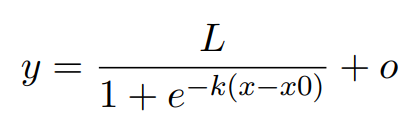

Fit this model to the data and show to the plots of the data and the curve predicted by the
model. Additionally, display the parameters found for the logistic model and explain the meaning of each one.  

Note: I suggest you use these starting values for the minimization: L = 1000, x0 = 10, k = 0.1 and
o = −300. If you use other values the minimization may not converge properly.


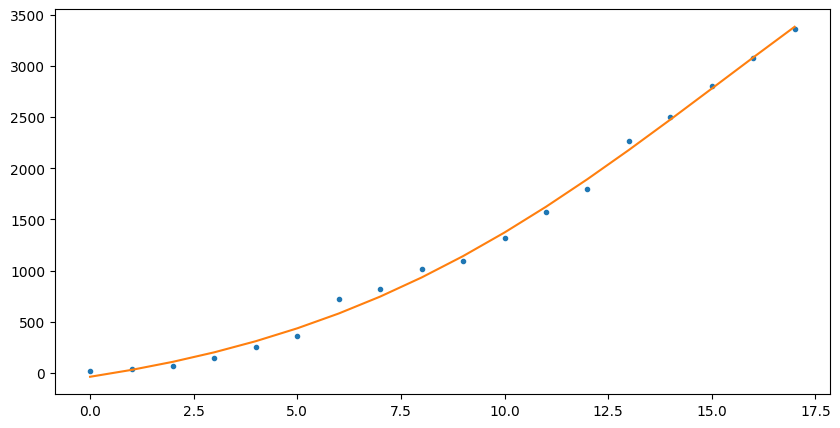

In [79]:
#TODO

from scipy.optimize import minimize

# Logistic Function
def logistic(x,x0,L,k):
    return L/(1 + np.exp(-k*(x-x0)))

# Cost function - Minimize mean squared error
def log_cost(params, data):
    x0,L,k,offset = params
    pred = logistic(data.iloc[:,0],x0,L,k) + offset
    return np.mean( (pred-data.iloc[:,1])**2)

st_params = [10,1000,0.1,-300]
plt.figure(figsize=(10,5))
res_1=minimize(log_cost,st_params,args=(dataset_df))
x0,L,k,offset = res_1.x # Best parameters found

# Use the model found (logistic model with a set of parameters and an offset) to predict the values
pred_logistic = logistic(dataset_df.iloc[:,0],x0,L,k) + offset

# Plot the data and the model built
plt.plot(dataset_df.iloc[:,0],dataset_df.iloc[:,1],'.')
plt.plot(dataset_df.iloc[:,0],pred_logistic)

In [80]:
#TODO
# Calculating the parameters of the model
print('x0 = '+ str(x0),'L = '+str(L),'k = '+str(k),'offset = '+ str(offset))

x0 = 15.220609941630265 L = 6461.817294676044 k = 0.18872427426510888 offset = -384.6896150468235


### Explanations of the parameters:

- x0 = Defines the x value of the sigmoid midpoint --> Fixed position of the turning point of the S curve --> Defines in our case the turning point by 15.22 years.
- k = Defines the steepness of the curve (or, logistic growth rate) --> Greater x0 relates to a steeper curve and S course of the curve --> Defines in our case the slope of 0.189 means not a high slope.
- L = Defines the curve's maximum value --> In our case the maximum value is 6461.82 million users --> The L is much higher as our datapoints because we have to less points and have to extand the set manually to reach the upperlimit calculated as offset+L.
- Offset = An offset variable represents the mathematically lower and upper boundary of the model. The offset is the value by which the model must be shifted so that it lies with the trend exactly on the data points and can describe them. In our case, we shift the logisitc function down by 384.69 so that it lies on the data points and can predict the users. This is a shift of the y-axis section, since the logisitc function comes from the negative area and should predict the positive user numbers in the 2 quadrant. Furthermore, the upper limit of the model must also be adjusted due to the shift. Therefore the upper limit is described by offset+L in our case it is XX and the lower limit is the offset and therefore -384.69 so the range of our model is with the start at -384.69 and the end at (-384.69+6461.82) and therefore exactly meets our data points.

## Question 2 (2 points out of 20)

Compute and plot the residuals of the model found. What can we tell about the model identified based on the Residual Plot? Is a logistic function a good option to model users' growth over time in our dataset?

Average of the residuals 54.56428226399507


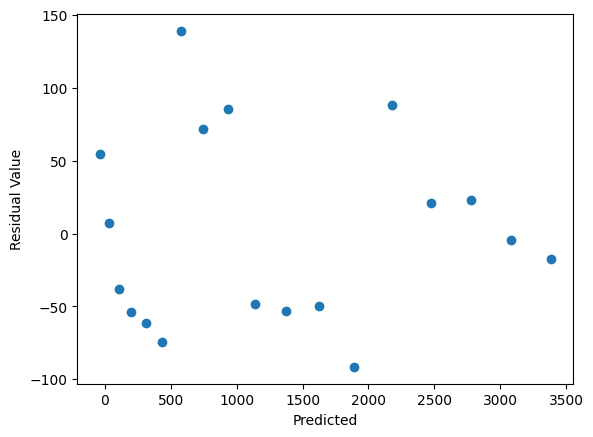

In [81]:
#TODO

# Plot resiudals

residuals_logistic = dataset_df.iloc[:,1] - pred_logistic



plt.scatter(pred_logistic, residuals_logistic)
plt.xlabel('Predicted')
plt.ylabel('Residual Value')

# Mean of the resiudal to evaluate the model
residual_logistic_mean = abs(residuals_logistic).mean()
print('Average of the residuals ' +str(residual_logistic_mean))


### Result

- The shown model is not well working because the value of the residuals are not normaly distributed around zero and also widely scattered from zero as seen in the plot above. Furthermore the data set consists of too few data points which relates to very few residual points to make an adequate statement about the accuracy of the forecast and the model. Thats why the model is not confident to make adequate predicitions.
- The model has a deviation between actuals and predicted values of 54.56 million users which is a small deviation compared to the range up to 3500 million users. Therefore, the model should not be discarded completely but should be rechecked later with more data. The resiudals can also approach a normal distribution there by using more datapoints.
- In summary, however, the model is currently not to be used at this time for the reasons mentioned.

## Question 3 (3 points out of 20)

Compute the 95% confidence interval for its parameters under the assumption that the random error affecting the data points comes from the same distribution for all points.

In [82]:
#TODO

# Single lists for each parameter
x0_ls=[]
L_ls=[]
k_ls=[]
offset_ls=[]

# Bootstrapping to fill the empty lists with 10 samples of parameters
replicas = 10

col_names = ['x0','L','k','offset']

df_unc = pd.DataFrame(columns= col_names)


for _ in range(replicas):

    rep_data = dataset_df.copy() 

    rep_data.iloc[:,1] = pred_logistic + residuals_logistic*np.random.normal(size=dataset_df.shape[0])

    res_2=minimize(log_cost,st_params,args=(rep_data))
    x0,L,k,offset = res_2.x
    x0_ls.append(x0)
    L_ls.append(L)
    k_ls.append(k)
    offset_ls.append(offset)

# Create a DataFrame out of the lists of each parameter
df_unc_1 = pd.DataFrame([x0_ls,L_ls,k_ls,offset_ls])
df_unc_1 = df_unc_1.transpose()
df_unc_1.columns=['x0','L','k','offset']
print('Overview about the values of the parameters in the logisitc functions')
display(df_unc_1)


# Calculation of the 95% confidence interval of each parameter
# Range quantile 0.025 until 0.975 to get the 95% confidence interval --> Each side a border by 0.025 in total 0.05 (100-0.05 = 0.95)
# Giving the 0.025 quantil as one border and the 0.975 quantile as the other border of the range

x0_95_interval = [df_unc_1['x0'].quantile(0.025,interpolation = 'midpoint'), df_unc_1['x0'].quantile(0.975, interpolation = 'midpoint')]
L_95_interval = [df_unc_1['L'].quantile(0.025,interpolation = 'midpoint'), df_unc_1['L'].quantile(0.975, interpolation = 'midpoint')]
k_95_interval = [df_unc_1['k'].quantile(0.025,interpolation = 'midpoint'), df_unc_1['k'].quantile(0.975,interpolation = 'midpoint')]
offset_95_interval = [df_unc_1['offset'].quantile(0.025,interpolation = 'midpoint'), df_unc_1['offset'].quantile(0.975,interpolation = 'midpoint')]

print('95% confidence interval of the parameter x0: '+str(x0_95_interval))
print('95% confidence interval of the parameter L: '+str(L_95_interval))
print('95% confidence interval of the parameter k: '+str(k_95_interval))
print('95% confidence interval of the parameter offset: '+str(offset_95_interval))


Overview about the values of the parameters in the logisitc functions


,x0,L,k,offset
0,17.150036,7752.846819,0.167803,-427.494939
1,13.487243,5200.522490,0.234997,-243.446566
2,25.611873,15844.969573,0.112935,-921.669988
3,14.004857,5735.551265,0.204192,-355.701221
4,15.171715,6354.525961,0.192757,-343.303750
5,13.945312,5478.320746,0.216078,-246.706882
6,13.444630,5059.733039,0.240177,-194.826725
7,16.588659,7431.768026,0.174389,-426.638242
8,16.273899,7364.106000,0.167138,-512.809423
9,15.306787,6566.838962,0.184453,-397.606239


95% confidence interval of the parameter x0: [13.465936709797537, 21.380954348429334]
95% confidence interval of the parameter L: [5130.127764296252, 11798.908195841188]
95% confidence interval of the parameter k: [0.14003674841176988, 0.23758735424942123]
95% confidence interval of the parameter offset: [-717.2397055021777, -219.13664525251465]


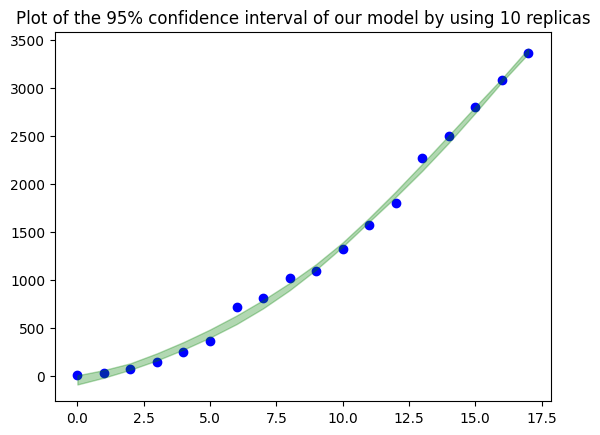

In [83]:
params = []
lines = []
x = dataset_df[['year']]
y = dataset_df[['n_users']]
residual_log = dataset_df.iloc[:,1]-pred_logistic

replicas = 10

df_unc = pd.DataFrame(x)

i = 0;
for _ in range(replicas):

    rep_data = dataset_df.copy() 

    rep_data.iloc[:,1] = pred_logistic + residual_log*np.random.normal(size=dataset_df.shape[0])

    res=minimize(log_cost,st_params,args=(rep_data))
    x0,L,k,offset = res.x
    pred_replica = logistic(dataset_df.iloc[:,0],x0,L,k)+offset

    df_unc =  pd.concat([df_unc, pred_replica], axis=1)
    df_unc
    i = i + 1

# Plot of the 95% confidence interval of the model by using 10 replicas with bootstrapping

df_unc = df_unc.iloc[:, 1:replicas]
plt.scatter(dataset_df.iloc[:,0], dataset_df.iloc[:,1], color='blue')

# Calculate values of 95% confidence interval
df_unc['p2.5'] = df_unc.quantile(0.025, axis = 1,interpolation = 'midpoint')
df_unc['p975'] = df_unc.quantile(0.975, axis = 1,interpolation = 'midpoint')

# Plot the confidence interval
plt.fill_between(dataset_df.iloc[:,0], df_unc[['p2.5']].iloc[:,0], df_unc[['p975']].iloc[:,0], color='green',alpha=0.3)
plt.title('Plot of the 95% confidence interval of our model by using 10 replicas')
plt.show()

### Result:
Process and meaning of bootstrapping:

- We are calculating slightly different datasets with the same distribution by using bootstrapping
- Calculation of different replicas of our dataset and models of that slightly different datasets: pred + resiudals * with random normal distribution of values between -1 and 1.
- Residuals are the deviation * normally distributed randome value between -1 and 1 thus most values are close to 0 and let the residuals and thus deviation vary a bit by multiplication so we get different models
- Afterwards we are calculating the interval in which the different models of slightly different datasets are located

Result:
- We are calculating in green the 95% confidence interval and the red line is demonstrate the median of the different models
- We can recognize that the model seem that we using a really good model with a high accuracy because the interval is really small and close to the median
- We are getting a low deviation of the different models thus means the uncertanty is low
